# Pandas and Visualization

pandas is a library that is indended to make data analysis easier.

The central concept in pandas is a "dataframe". These dataframes are similar (in many respects) to Excel spreadsheets. They are typically 2-dimensional representations of data.

The first thing that we need to do is to import pandas. By convention, we rename it to "pd".

We're also importing another visualization library called seaborn. Again, by convention it's imported as "sns"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

## Getting the data

For now, we are assuming that you have data from somewhere else, in a [CSV file](https://en.wikipedia.org/wiki/Comma-separated_values). For today's exercises, we're going to use data that I got from [BigQuery](https://console.cloud.google.com/bigquery), which is a tool produced by Google for querying huge datasets.

The folks at [Pushshift](https://pushshift.io/) gather and publish a bunch of the data from reddit. I queried their data to get a random set of 100K comments from 2018. You can download that data [here](https://github.com/jdfoote/Intro-to-Programming-and-Data-Science/raw/master/resources/data/100k_random_reddit_2018.csv).

First, we load it into a dataframe. Change the path to where you are storing your data.

In [3]:
reddit_df = pd.read_csv('100k_random_reddit_2018.csv')

The "head" method lets us look at the first few rows of the data

In [4]:
reddit_df.head()

,created_utc,subreddit,author,comment_length,score
0,1514764841,Astronomy,illuminatiisnowhere,50,3
1,1514764972,politics,ExtracurricularSpork,31,10
2,1514765017,frugalmalefashion,TheBarnhouseEffect,126,5
3,1514765217,KansasCityChiefs,thenewguyreddit,48,5
4,1514765360,Aeon,ribnag,385,1


As you can see, this is organized a lot like a spreadsheet or a CSV file. Each row is an observation, and each column is a measure about that observation. In this case, a row represents a comment on reddit.

We are going to be talking a lot more about how to manipulate and work with this data. This document is intended to introduce a few key ideas.

## Selecting data

The first is selecting data - getting a subset of the data.

This is a really confusing thing about pandas and takes some getting used to. There is a detailed explanation [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) but I'm going to try to give a gentler introduction here.

The main thing that trips people up is remembering that dataframes have an "index". By default, this is a number that refers to each row in the dataframe. If you look at our dataframe, you will see that on the far left is an unnamed column of numbers starting at 0. This is the index.

It is assigned in the order that the rows were in the CSV file. However, it can change if we reorder things.

For example, this code will sort the dataframe by comment length. Notice how the index numbers are now out of order.

In [5]:
df_by_length = reddit_df.sort_values('comment_length', ascending=False)
df_by_length.head()

,created_utc,subreddit,author,comment_length,score
21207,1522288057,LoveNikki,queerestqueen,10045,6
52329,1532344433,Music,DJ_Spam,9726,1
78315,1540314439,NewsBrasil,newsbrasilbot,9720,1
61600,1535240874,NFLstream4kHD,Illustrious_Play,9577,1
71908,1538405283,Music,DJ_Spam,9418,2


We can use this "out of order" version of the data fram to show the difference between the two main ways of selecting data: `iloc` and `loc`.

`iloc` selects data like a list index, based on the location in the current dataframe. The syntax is just like selecting elements from two lists: the row list and the column list. If we use slice notation it looks like this:

`dataframe_name.iloc[starting_row:ending_row, staring_column:ending_column]`

You can also select a list of row numbers or column numbers. Below, I pass a list of columns to select.

In [6]:
# This code gets the first 10 rows and columns 1, 3, and 4
df_by_length.iloc[0:10, 1:5]# or [1,3,4]]

,subreddit,author,comment_length,score
21207,LoveNikki,queerestqueen,10045,6
52329,Music,DJ_Spam,9726,1
78315,NewsBrasil,newsbrasilbot,9720,1
61600,NFLstream4kHD,Illustrious_Play,9577,1
71908,Music,DJ_Spam,9418,2
33033,FortNiteBR,GrantWardKilledDeath,9345,8
91701,conspiracy,th3yc3b,9187,1
13795,The_Mueller,Quietus42,9134,18
98385,kol,icon315,9100,5
44483,copypasta,CummyBot2000,8969,1


The `loc` syntax, on the other hand, selects based on labels. It selects rows based on index labels and columns based on column names. When something is sorted, this can have unexpected consequences. 

For example, we might think that the code below would just select the first three rows, or maybe the three rows with indexes 0,1, and 2. Instead, it starts with the item with index `0`, and selects all of the rows from that row until the row with index `3`, as currently sorted! Notice at the bottom of the output, it says that the length is 1,494!

In [7]:
df_by_length.loc[0:3, 'comment_length']

0        50
4910     50
46574    50
46678    50
56224    50
         ..
61453    48
62063    48
25059    48
955      48
3        48
Name: comment_length, Length: 1494, dtype: int64

## Boolean indexing

Typically, if we want to get a certain number of rows, we use `.iloc`. However, if we want to filter data based on its value, then we typically use `.loc`

For example, if we wanted to get the first 3 rows by their index, we'd need to do something like this, which uses "boolean indexing" to filter to only the rows where the index is less than or equal to 3.

In [8]:
df_by_length.loc[df_by_length.index < 3,"comment_length":]

,comment_length,score
2,126,5
0,50,3
1,31,10


Or, if we wanted to just get the subreddit and the score whenever scores are above the median score, we could do this:

In [9]:
df_by_length.loc[df_by_length.score > df_by_length.score.median(),['subreddit', 'score']]

,subreddit,score
21207,LoveNikki,6
33033,FortNiteBR,8
13795,The_Mueller,18
98385,kol,5
95387,HPHogwartsMystery,5
...,...,...
87238,memes,3
65012,teenagers,6
54485,AskOuija,3
54527,AskOuija,3


Finally, it is possible to filter dataframes without using `iloc` or `loc`

One that's useful is dot notation - as long as your column names don't have spaces, you can do something like:

In [10]:
# Just gives one column
df_by_length.score

# This is equivalent, and can handle spaces
df_by_length['score']

21207    6
52329    1
78315    1
61600    1
71908    2
        ..
79848    2
54527    3
84270    5
99714    1
79494    1
Name: score, Length: 99910, dtype: int64

In [11]:
# If you use slicing notation, this will give you rows (like iloc)

df_by_length[:5]

,created_utc,subreddit,author,comment_length,score
21207,1522288057,LoveNikki,queerestqueen,10045,6
52329,1532344433,Music,DJ_Spam,9726,1
78315,1540314439,NewsBrasil,newsbrasilbot,9720,1
61600,1535240874,NFLstream4kHD,Illustrious_Play,9577,1
71908,1538405283,Music,DJ_Spam,9418,2


### Exercise 1

Sort the data frame by score and select the rows with the 10th to 20th highest scores.


In [12]:
df_by_score = reddit_df.sort_values('score', ascending = False)
df_by_score[9:20]

,created_utc,subreddit,author,comment_length,score
63126,1535693715,madlads,craggolly,80,4827
73188,1538758397,AskReddit,Ankoku_Teion,127,4675
79165,1540552716,gaming,testawayacct,137,4666
1963,1515542877,StarWars,TLM86,162,3959
23011,1522931043,AskReddit,JelloVV,189,3789
64345,1536078182,therewasanattempt,OfficialAlectPrasad,120,3778
88861,1543329669,fo76,honorelove,42,3718
8514,1517871679,videos,Zackmorristhecat,84,3663
77395,1540038919,videos,radioheady,70,3564
96618,1545408372,TwoXChromosomes,Pr2r,303,3562


### Exercise 2

Now, how would you select just the `subreddit` and `comment_length` columns for the rows you selected above?

In [13]:
# This one
df_by_score.iloc[9:20, [1, 3]]
# Or this one
df_by_score.iloc[9:20,].loc[:,["subreddit", "comment_length"]]

,subreddit,comment_length
63126,madlads,80
73188,AskReddit,127
79165,gaming,137
1963,StarWars,162
23011,AskReddit,189
64345,therewasanattempt,120
88861,fo76,42
8514,videos,84
77395,videos,70
96618,TwoXChromosomes,303


## Grouping and aggregating

Pandas is also great for grouping and aggregating data.

We're going to talk a lot more about analyzing data but here's a quick introduciton to some great built in functions like max, sum, and mean

In [33]:
# Get the mean score and comment length

df_by_length.loc[:,"comment_length":"score"].mean()

comment_length    162.317035
score               8.736553
dtype: float64

We also might want to create subreddit-level or person-level measures. To do this, we'll want to "group" the data.

The groupby function will create a "grouped" dataframe, where aggregations apply to the group rather than the whole dataframe. I think of this as temporarily sorting all of the rows into their own mini-spreadsheets based on whatever is in the `groupby` function.

For example, this will tell use the average comment score by subreddit:

In [34]:
# Note that I'm using the original dataframe but either one would work

# Groups by subreddit, then gets the score column
# Then gets the mean of that column, then sorts it by the value of the column
reddit_df.groupby('subreddit').score.median().sort_values()

subreddit
happyendings            -56.0
u_washingtonpost        -24.5
deepthroat              -20.0
wwiipics                -13.5
Bundesliga              -13.0
                        ...  
shittydarksouls         119.0
TalesFromTheCustomer    167.5
LearnUselessTalents     217.0
HobbyDrama              236.0
Dogberg                 455.0
Name: score, Length: 10198, dtype: float64

As another example, this will get the number of comments per person:

In [ ]:
reddit_df.groupby('author').size().sort_values()

### Exercise 3

Find the average (mean) comment length for each subreddit and sort by comment length

In [35]:
reddit_df.groupby('subreddit').comment_length.mean().sort_values()

subreddit
AskTheOuija                1.0
Boilermakers               1.0
im30andthisissheep         1.0
askOuiji                   1.0
FalconsBuccaneerlive       1.0
                         ...  
EnglishOneThirtyOne     6054.0
TheTruthTellers         6214.0
DestructiveReaders      7532.0
NFLstream4kHD           9577.0
NewsBrasil              9720.0
Name: comment_length, Length: 10198, dtype: float64

We can talk more about this in class, but this creates a user-based dataframe with data for the number of subreddits, number of comments, and average score for each user.

In [36]:
grouped_df = reddit_df.groupby('author')

subreddit_count = grouped_df.subreddit.nunique()
comments_count = grouped_df.size()
score_mean = grouped_df.score.mean()

person_df = pd.DataFrame({'subreddit_count': subreddit_count,
                          'comments_count': comments_count,
                          'comments_mean': score_mean})

In [42]:
person_df.head()

,subreddit_count,comments_count,comments_mean
author,,,
---------_---------_,1,1,1.0
--------__--_---,1,1,1.0
-----_------_---,1,1,1.0
-----o____,1,1,7.0
----Prometheus----,1,1,2.0


# Visualizations

Python has a powerful (and complicated) plotting library called matplotlib. If you want to do more complicated plots, I highly recommend learning how to use it. For now, I'm going to introduce the visualizations that are part of pandas, and later introduce some which are part of Seaborn. Both of these are based on matplotlib but make it easier and simpler to use.

I'm introducing a few basic visualizations here. You should [read and reference this page](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#pie-plot) to learn about a bunch more options.

### Scatterplots

I think it would be interesting to know if there's a relationship between the length of comments and the score. This plot shows the scatterplot of that relationship.

<AxesSubplot:xlabel='comment_length', ylabel='score'>

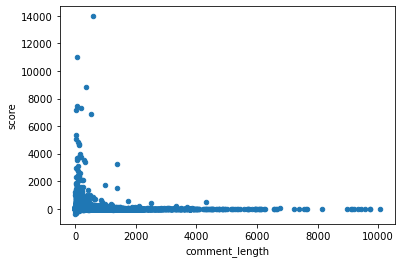

In [43]:
reddit_df.plot.scatter(x = 'comment_length', y = 'score')

Both of these measures are really skewed, so let's try plotting them on log scales instead.

In [44]:
reddit_df['comment_logged'] = np.log(reddit_df.comment_length)
# Scores can be negative, so we add the minimum (plus one) to make sure they are positive
# And then log transform
reddit_df['score_logged'] = np.log(reddit_df.score + abs(reddit_df.score.min()) + 2)

C:\Users\jplr1\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='comment_logged', ylabel='score_logged'>

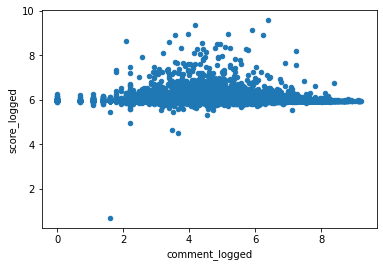

In [45]:
reddit_df.plot.scatter(x = 'comment_logged', y = 'score_logged')

Not much of a relationship there.

### Exercise 4

Plot the number of comments and average score. Are frequent posters more likely to share comments that are well-received?

*Hint*: You will want to use a dataframe that groups the data by person

<AxesSubplot:xlabel='comment_logged', ylabel='score_logged'>

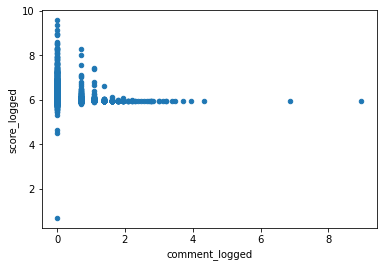

In [14]:
grouped_df = reddit_df.groupby('author')

#subreddit_count = grouped_df.subreddit.nunique()
comments_count = grouped_df.size()
score_mean = grouped_df.score.mean()

person_df = pd.DataFrame({#'subreddit_count': subreddit_count,
                          'comments_count': comments_count,
                          'comments_mean': score_mean})

person_df['comment_logged'] = np.log(person_df.comments_count)
person_df['score_logged'] = np.log(person_df.comments_mean + abs(person_df.comments_mean.min()) + 2)

person_df.plot.scatter(x = 'comment_logged', y = 'score_logged')

## Time Series

The last thing I want to show is how to do time series (because they are confusing!)

The key thing to remember is that the plots assume that time is the index of the data frame. By default, the index is just the row number of the row when it was first imported.

So, the first thing we need to do is to convert the datetime column to the index.

`reddit_df.index` is where the index is stored, so the following code takes the `created_utc` column--which is the [Unix time](https://en.wikipedia.org/wiki/Unix_time) that each comment was posted--and converts it to a "DateTime", which is a way of representing a date and time in Python. It then stores the datetime in the index.

In [15]:
reddit_df.index = pd.to_datetime(reddit_df.created_utc, unit='s', utc=True)
reddit_df.head()

,created_utc,subreddit,author,comment_length,score
created_utc,,,,,
2018-01-01 00:00:41+00:00,1514764841,Astronomy,illuminatiisnowhere,50,3
2018-01-01 00:02:52+00:00,1514764972,politics,ExtracurricularSpork,31,10
2018-01-01 00:03:37+00:00,1514765017,frugalmalefashion,TheBarnhouseEffect,126,5
2018-01-01 00:06:57+00:00,1514765217,KansasCityChiefs,thenewguyreddit,48,5
2018-01-01 00:09:20+00:00,1514765360,Aeon,ribnag,385,1


This is a bit silly, but to display the number of comments over time, we need to sum up the number of comments, so we need to have a column in our dataframe that represents the number of comments at each time period. In some data frames, this makes sense --- for example, you might have a count of the number of tweets per minute. In our case, each row just represents one comment, so we make a new column call `num_comments` which is just set to `1`.

In [16]:
reddit_df['num_comments'] = 1

In order to make a time series, we have to combine the data. The `resample` function does this. Below, we combine it by hour to see daily trends.

In [17]:
hourly_comments = reddit_df.resample('H').num_comments.sum()

<AxesSubplot:xlabel='created_utc'>

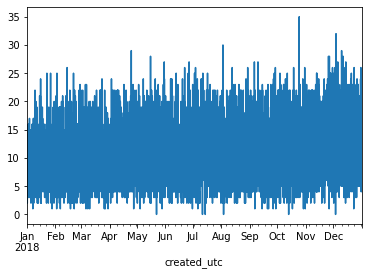

In [18]:
hourly_comments.plot()

This is too messy, so let's zoom in on just a few weeks, using boolean indexing

<AxesSubplot:xlabel='created_utc'>

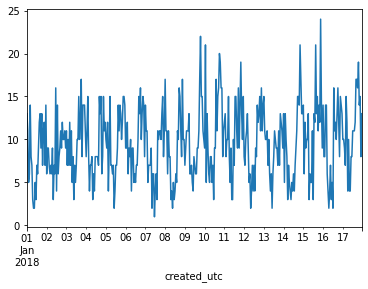

In [19]:
hourly_comments.loc[hourly_comments.index < '2018-01-18'].plot()

### Exercise 5

Plot the number of comments per month over the year.

<AxesSubplot:xlabel='created_utc'>

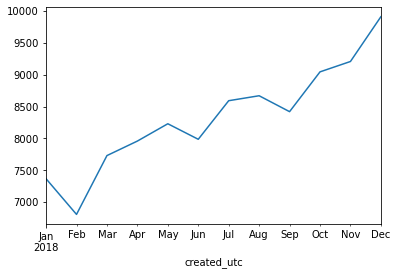

In [20]:
monthly_comments = reddit_df.resample('M').num_comments.sum()
monthly_comments.plot()

Finally, if we wanted to summarize by hour, we could group the posting time by hour. Below, we see that about 8:00 UTC (which is about 3:00 AM Eastern) corresponds to the lowest activity time.

<AxesSubplot:xlabel='created_utc'>

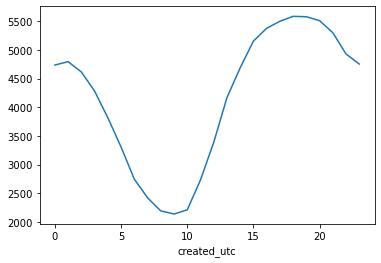

In [21]:
reddit_df.groupby(reddit_df.index.hour).num_comments.sum().plot()

### Exercise 6

See if you can figure out how to change the above plot so that instead of showing one overall line for comments per hour, it shows a line for each day of the week (e.g., a line for comments per hour on Mondays, another for Tuesdays, etc.).

This code can help you to get started: it sums the number of comments by hour and day.

In [22]:
reddit_df.groupby([reddit_df.index.hour, reddit_df.index.weekday]).num_comments.sum()

created_utc  created_utc
0            0              703
             1              683
             2              703
             3              709
             4              676
                           ... 
23           2              719
             3              710
             4              668
             5              614
             6              644
Name: num_comments, Length: 168, dtype: int64

<AxesSubplot:xlabel='hour_day'>

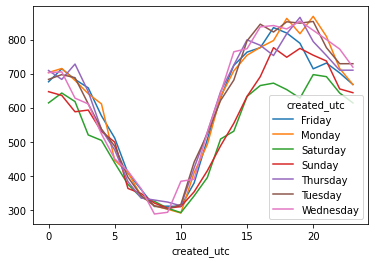

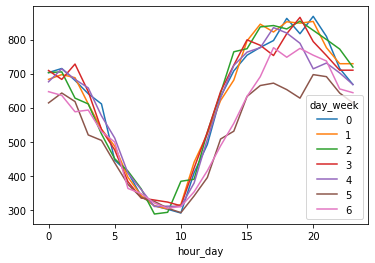

In [51]:
# Either this one
reddit_df.groupby([reddit_df.index.hour, reddit_df.index.day_name()]).num_comments.sum().unstack().plot()
# Or this one
from pandas import DataFrame
daily_comments = reddit_df.resample('H').num_comments.sum()
graph = list()
hour_day = 0
day_week = 0
for day in daily_comments:
    graph.append((hour_day, day_week, day))
    hour_day += 1
    if(hour_day > 23):
        hour_day = 0
        day_week += 1
    if(day_week > 6):
        day_week = 0
hour_day_df = DataFrame (graph, columns = ["hour_day", "day_week", "comments"])
hour_day_df.groupby(["hour_day", "day_week"]).comments.sum().unstack().plot()